# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 


#### Columnwise reshape
Let $B = (b_1,..., b_n )$  $X = (x_1 ,..., x_m )$

The $k^{th}$ column of AXB

$$(AXB)_{:,k} = A X b_k = A \sum_{i=1}^n x_i b_{ik} = A \sum_{i=1}^n b_{ik} x_i  = \begin{pmatrix} b_{1k} A & ... & b_{nk} A \end{pmatrix} \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix} = (b_k^T \otimes A) vec(X)$$

$$vec(AXB) = \begin{pmatrix} (AXB)_{:,1} \\ \vdots \\ (AXB)_{:,n}\end{pmatrix} = \begin{pmatrix} AXb_1 \\ ... \\ AXb_n \end{pmatrix} = 
 \begin{pmatrix} b_1^T \otimes A \\ ... \\ b_n^T \otimes A\end{pmatrix} vec(X) = (B^T \otimes A) vec(X)$$
 
##### Rowwise reshape:

$A = \begin{pmatrix} a_1 \\ ... \\ a_n \end{pmatrix} , X = \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix}$

$$(AXB)_{k,:} = a_k X B =  \sum_{i=1}^n a_{ik} x_i B =  \sum_{i=1}^n a_{ik} B^T x_i  = \begin{pmatrix} a_{1k} B^T & ... & a_{nk} B^T \end{pmatrix} \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix} = (a_k \otimes B^T) vec(X)$$

$$vec(AXB) = \begin{pmatrix} (AXB)_{1,:} \\ \vdots \\ (AXB)_{n,:}\end{pmatrix} = \begin{pmatrix} a_1XB &  ...  a_nXB \end{pmatrix} = 
 \begin{pmatrix} a_1 \otimes B^T & ... & a_n \otimes B^T\end{pmatrix} vec(X) = (A \otimes B^T ) vec(X)$$

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.


#### Naive way:
The complexety of the Kronecker product  between 2 matrices is $\mathcal{O}(n^4)$ operations.  After, product  by vector X is complexety $\mathcal{O}(n^2)$.$~~~$ Finally, the complexity of a naive computation is $\mathcal{O}(n^4)$.

#### Faster way: 
let use equation from $1^{st}$ point.
We should reshape vector $x$ into $n \times n$-sized matrix. 
$$x \Rightarrow vec(X)~~ ~reshaping~ with~ complexety~\mathcal{O}(n^2) $$
then $$(A \otimes B)x = (A \otimes B) \mathrm{vec} (X) = \mathrm{vec}(BXA^T)$$

Complexety of multiplication of three $n \times n$-sized matrices ($B,X,A^T$) is $\mathcal{O}(n^3)$. 

Finally, resulting complexity of matrix-vector multiplicatin is $\mathcal{O}(n^3)$.


- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.

Square nonsinqular matrices have inverse property:
$$ (A \otimes B)^{-1} = (A^{-1} \otimes B^{-1})$$

$$
(A\otimes I + I \otimes B) = (S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1}) =$$

<center> From property of distributivity we have </center> $$ =  
(S_A \otimes I)[\Lambda_A \otimes I + I \otimes S_B\Lambda_B S_B^{-1}] (S_A \otimes I)^{-1} = $$
$$= (S_A \otimes I)(I \otimes S_B)[\Lambda_A \otimes I + I \otimes \Lambda_B] (I \otimes S_B)^{-1}
(S_A \otimes I)^{-1} = $$
<center> From inverse property we have </center>
$$
=[(S_A \otimes I)(I \otimes S_B)] [\Lambda_A \otimes I + I \otimes \Lambda_B] 
[(S_A \otimes I)(I \otimes S_B)]^{-1} = 
$$
$$ = [S_A \otimes S_B] [\Lambda_A \otimes I + I \otimes \Lambda_B] [S_A \otimes S_B]^{-1}$$

So we have eigendecomposition of $A\otimes I + I \otimes B = S \Lambda S^{-1}$, where

\begin{align*}
& S = (S_A \otimes I)(I \otimes S_B) \\
& \Lambda = \Lambda_A \otimes I + I \otimes \Lambda_B = 
\begin{pmatrix} \lambda_{A1} I & 0 & 0 & \cdots & 0 \\
0 & \lambda_{A2} I & 0 & \cdots & 0 \\
\vdots &  & \ddots &  & \vdots \\
0 & \cdots & & & \lambda_{An} I\end{pmatrix} + 
\begin{pmatrix} \Lambda_{B} & 0 & 0 & \cdots & 0 \\
0 & \Lambda_{B} & 0 & \cdots & 0 \\
\vdots &  & \ddots &  & \vdots \\
0 & \cdots & & & \Lambda_{B} \end{pmatrix} 
\Rightarrow \Lambda = diag(\lambda_{Ai} + \lambda_{Bj} \lvert ~i = \overline{1, m};~~ j = \overline{1, n})
\end{align*}

Therefore, $\sigma(A\otimes I + I \otimes B) 
= \lbrace \lambda_{Ai} + \lambda_{Bj}~ \lvert~ i=\overline{1, m};~~ j = \overline{1, n} \rbrace$.

For each eigenvalue $\lambda_{Ai} + \lambda_{Bj}$ there is a corresponding eigenvector - column of $S_{Ai} \otimes S_{Bj}$


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

For all methods we will assume that $x_0 = \vec{0}$

And 
$\lambda_{max} = 1000$ and $\lambda_{min} = \frac{1}{1000}$.  

 - Richardson iteration with the optimal choice of parameter (use $2$-norm)
 
let $x_*$ - exact solution

Relative error using 2-norm:
$e_{k} = \frac{\|x_k - x_*\|_2}{\|x_*\|_2} \leq \|I - \tau A\|_2^k = \sigma^k_{max} (I - \tau A) = 
 \sigma^k_{max} \left(I - \frac{2}{\lambda_{\min} + \lambda_{\max}} A \right) 
 = \left(1 - \frac{2 \lambda_{min}}{\lambda_{\min} + \lambda_{\max}}\right)^k 
 \approx \left( 1 - \frac{2}{10^6}\right)^k$

As accuracy is less than $10^{-4}$, so

$\left( 1 - \frac{2}{10^6}\right)^k \leq 10^{-4}
\Rightarrow k \geq \frac{-4 \ln 10}{\ln \left( 1 - \frac{2}{10^6} \right)} \approx {4,6 \cdot 10^{6}}$
 
 - Chebyshev iteration (use $2$-norm)
$x_{k} = x_{k-1} - \tau_k (Ax_{k-1} - f), \text{ where } \tau_k = \frac{2}{\lambda_\max + \lambda_\min - (\lambda_\max - \lambda_\min)x_k}$

Relative error:

$$
   e_{k+1} \leq C q^k e_k, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},
$$
$$ q^{k} = \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1} \right)^{k} = 
  \left( \frac{\sqrt{\frac{\lambda_{max}}{\lambda_{min}}}-1}{\sqrt{\frac{\lambda_{max}}{\lambda_{min}}}+1} \right)^{k} \leq 10^{-4} 
$$

$ \left( \frac{1000 - 1}{1000 + 1} \right)^{k} \leq 10^{-4} \Rightarrow k = \frac{-4 \ln 10}{\ln \frac{999}{1001}} \approx {4,6 \cdot 10^{3}}$
 
 - Conjugate gradient method (use $A$-norm)
 
 Relative error bound for CG method:
$$\frac{\Vert x - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})| = 1001 
\text{ as all eigenvalues are different}$$

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.

Let $e_0$ is eigenvector  coresponding to eigenvalue  is equal to  $0$ in matrix $L$.
As we have singular matrux L then eigenvector corresponding to $\lambda=0$ has all ones 
$$
e_0 = {(1,1...,1)^T}
$$


$p$ it is initial vector, and $p^1$-vector of orthoprojection

$p^1=p-(e_0,p)\frac{e_0}{\| e_0\|}$,

Finally, projection  matrix $P$
$$
P=I-\frac{e_0e_0^T}{\| e_0\|}
$$

* (5 pts) Implement the spectral partitioning as the function ```partition```:

In [281]:
import scipy
from  scipy.sparse import csr_matrix
import numpy as np
from scipy.sparse import linalg

import networkx
import scipy
from scipy import sparse
from scipy.sparse import linalg
import numpy as np
import pandas as pd
import timeit
from  networkx import laplacian_matrix, lollipop_graph

import matplotlib.pyplot as plt

In [601]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):  # 10 pts
    n=A.get_shape()[0]
    diag=np.array(A.sum(axis=0)).flatten()
    D=scipy.sparse.diags(diag)
    L=D-A     
        
    e0 = np.ones(x0.shape[0])
    e0 = e0/n   
    
    x = x0  
    eigs = np.array([0])
    
    I =  scipy.sparse.eye(n)
    k = 0
          
    for i in range(num_iter_fix):  
        x = scipy.sparse.linalg.spsolve(L - shift*I,x )   
        x = x - np.sum(x)*e0 
        x = x/np.linalg.norm(x)   
        
        eig = x@L@x
        eigs = np.append(eigs, eig)
        
        if np.linalg.norm(eigs[k+1] - eigs[k])/np.linalg.norm(eigs[i+1]) <= eps:
            break
        k+=1
    
    if num_iter_fix == 0: 
        shift = 1e-3
        x = sparse.linalg.spsolve(L - shift*I, x)
        x = x - np.sum(x)*e0 
        x = x/np.linalg.norm(x)   
        eig = x@L@x
        eigs = np.append(eigs, eig)
        k+=1
        
    for i in range(num_iter_adapt):
        x=scipy.sparse.linalg.spsolve(L-shift*I,x)
        x=x-np.sum(x)*e0
        x=x/np.linalg.norm(x)
        
        eig = x@L@x
        eigs = np.append(eigs, eig)
       
        if np.linalg.norm(eigs[k+1]-eigs[k])/np.linalg.norm(eigs[k])<=eps: 
            break
        k+=1
        shift=x@L@x/np.linalg.norm(x)

    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

In [602]:
m = 100
n = 100
G = networkx.lollipop_graph(100, 100)
Gadg = networkx.adjacency_matrix(G)

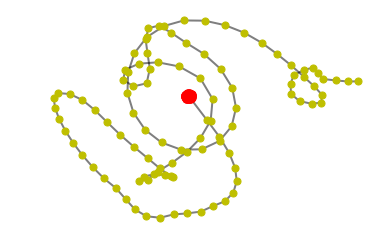

In [603]:
pos=networkx.spring_layout(G) # positions for all nodes

# nodes
networkx.draw_networkx_nodes(G,pos,
                       nodelist=list(range(m)),
                       node_color='r',
                       node_size=50)
networkx.draw_networkx_nodes(G,pos,
                       nodelist=list(range(m,m+n)),
                       node_color='y',
                       node_size=50)

# edges
networkx.draw_networkx_edges(G,pos,width=2.0,alpha=0.5)

plt.axis('off')
plt.show() # display


* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [604]:
G_part = partition(Gadg, 0.01,0,200, np.random.rand(200), 1e-12)[0]

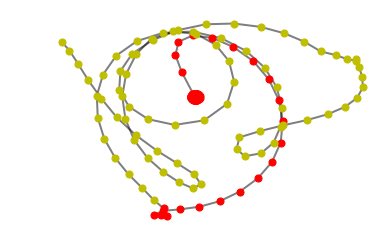

In [605]:
pos=networkx.spring_layout(G) # positions for all nodes

# nodes
networkx.draw_networkx_nodes(G,pos,
                       nodelist=list(np.where(G_part>0)[0]),
                       node_color='r',
                       node_size=50)
networkx.draw_networkx_nodes(G,pos,
                       nodelist=list(np.where(G_part<0)[0]),
                       node_color='y',
                       node_size=50)

# edges
networkx.draw_networkx_edges(G,pos,width=2.0,alpha=0.5)

plt.axis('off')
plt.show() # display

When we find follow approximation of eigenvector, we should solve system which come near singular i.e bad condition number.

Also our iterations can converge to various vectors from closest of eigenvalues of graph.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

First, consider the case where Laplacian graph  is connected. Let $x$ be a nonzero vector in $ker~L(G)$. Then $0~=~(Lx, x)~ = ~\sum_{j} \sum_{i \in N(j)} (x_i - x_j)^2$. Therefore, if $i ∼ j$, then $x_i = x_j$.
As $G$ is connected, $x_1~= \dots =~ x_n$.
Hence $dim~ker~L(G)~=~1$ and the eigenvalue 0 has multiplicity 1.

Let $G_1, G_2, \dots, G_m$ be the connected components of G which consist $n_1, \dots , n_m$
vertices.

let the vertices of G be indexed so that the vertices of $G_1$ are listed first, then $G_2$, and so on. 
Then L(G) is a block-diagonal matrix of the form

$$ L(G) = \begin{pmatrix} L(G_1)  &  &\\ & \ddots &  \\ &   & L(G_n)  \end{pmatrix}$$

$$\Rightarrow  ~ker~L(G)~=~ker~L(G_1)~\otimes \dots \otimes~ker~L(G_k)$$

Finally, we can conclude $dim~ker~L(G) = \sum_{i=1}^k~dim~ker~L(G_i) = k$

Then multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

In [606]:
C = networkx.cycle_graph(30)
C_adj = networkx.adjacency_matrix(C)
K = networkx.complete_graph(30)
K_adj = networkx.adjacency_matrix(K)
print("C =",networkx.algebraic_connectivity(C))
print("k = ",networkx.algebraic_connectivity(K))
part_c, eigs_c = partition(C_adj, 0.01,0,30, np.random.rand(30), 1e-9)
print(eigs_c[-1])
part_k, eigs_k = partition(K_adj, 0.01,0,30, np.random.rand(30), 1e-9)
print(eigs_k[-1])

C = 0.04370479853238912
k =  29.999999999999993
0.043704798532388726
29.999999999999993


In [580]:
E_i = np.arange(10,50,5)
lambda_sec_C = []
lambda_sec_K = []
for i in E_i:
    C = networkx.cycle_graph(i)
    C_adj = networkx.adjacency_matrix(C)
    K = networkx.complete_graph(i)
    K_adj = networkx.adjacency_matrix(K)
    
    eigs_c = partition(C_adj, 0.01,0,i, np.random.rand(i), 1e-9)[1]
    eigs_k = partition(K_adj, 0.01,0,i, np.random.rand(i), 1e-9)[1]
    
    lambda_sec_C.append(eigs_c[-1])
    lambda_sec_K.append(eigs_k[-1])

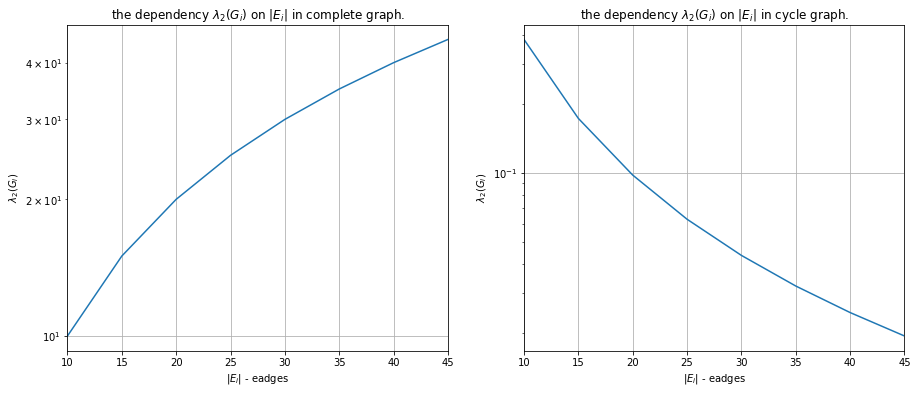

In [581]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title(r'the dependency $\lambda_2(G_i)$ on $|E_i|$ in complete graph.')
plt.ylabel(r'$\lambda_2(G_i)$')
plt.xlabel(r'$|E_i|$ - eadges')
plt.xlim(10,45)
plt.semilogy(E_i,lambda_sec_K)
plt.grid()

plt.subplot(122)
plt.title(r'the dependency $\lambda_2(G_i)$ on $|E_i|$ in cycle graph.')
plt.ylabel(r'$\lambda_2(G_i)$')
plt.xlabel(r'$|E_i|$ - eadges')
plt.xlim(10,45)
plt.semilogy(E_i,lambda_sec_C)
plt.grid()

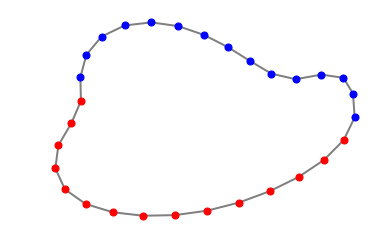

In [607]:
pos=networkx.spring_layout(C) # positions for all nodes

# nodes
networkx.draw_networkx_nodes(C,pos,
                       nodelist=list(np.where(part_c>0)[0]),
                       node_color='r',
                       node_size=50)
networkx.draw_networkx_nodes(C,pos,
                       nodelist=list(np.where(part_c<0)[0]),
                       node_color='b',
                       node_size=50)

# edges
networkx.draw_networkx_edges(C,pos,width=2.0,alpha=0.5)

plt.axis('off')
plt.show() # display

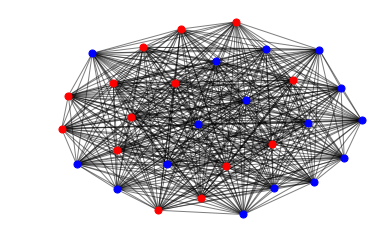

In [608]:
pos=networkx.spring_layout(K) # positions for all nodes

# nodes
networkx.draw_networkx_nodes(K,pos,
                       nodelist=list(np.where(part_k>0)[0]),
                       node_color='r',
                       node_size=50)
networkx.draw_networkx_nodes(K,pos,
                       nodelist=list(np.where(part_k<0)[0]),
                       node_color='b',
                       node_size=50)

# edges
networkx.draw_networkx_edges(K,pos,width=1.0,alpha=0.5)

plt.axis('off')
plt.show() # display

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

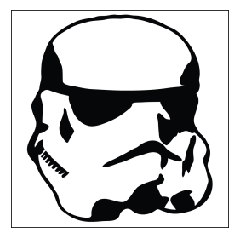

In [611]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np


url='https://avatanplus.com/files/resources/small/58fdbb3b5481b15b9f235fd2.png'

picture1 = Image.open(requests.get(url, stream=True).raw)
picture1 = np.array(picture1).astype(np.uint8)
plt.imshow(picture1)
plt.xticks(())
plt.yticks(())
plt.show()

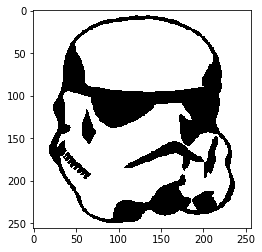

In [672]:
binary=(picture1[:,:,0]<180)
plt.imshow(binarized,cmap='binary')

In [702]:
def to_graph(pic_bin):

    x,y = np.array(np.nonzero(pic_bin))
    
    n = len(x)
    n_pic = len(pic_bin)
    d={str(x[k])+","+str(y[k]): k for k in range(n)}
    i0 = []
    j0 = []
    value = []
    
    for k in range(n):

        i1 = max(0, x[k]-1)
        i2 = min(n_pic, x[k]+1)
        j1 = max(0, y[k]-1)
        j2 = min(n_pic, y[k]+1)
        for i in range(i1,i2+1):
            for j in range(j1, j2+1):
                if pic_bin[i,j] == 1 and i != x[k] and j!= y[k]:
                    key = str(i)+','+str(j)
                    if key in d:
                        i0.append(k)
                        j0.append(d[key])
                        value.append(1)

                        
                    
    graph = scipy.sparse.csr_matrix((value, (i0, j0)), shape = (n, n))

    return graph

In [703]:
A=to_graph(binary)

In [704]:
colored = np.copy(binary)
s,eigs = partition(A, 0.01, 20, 1, np.random.rand(A.shape[0]),0) 
for i in range(len(s)):
    if s[i]>0:
        colored[x[i],y[i]]=0.5

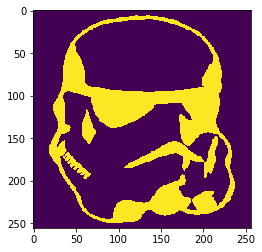

In [705]:
plt.imshow(colored)

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

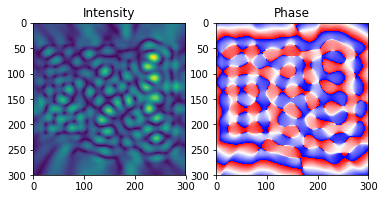

In [685]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
T_{\overline{i_1 j_1}, \overline{i_2 j_2} } \equiv eG_{i_1-j_1,i_2-j_2}  = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$T_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$


### Tasks:

1. (5 pts) Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. (5 pts) Write function `Gx` that calculates matvec of $T$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. Hint: matvex with a delta function in pl

3. (3 pts) What is the complexity of one matvec? 
4. (2 pts) Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. (15 pts) Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.g. `numpy.fft`


### 1. Kernel (5 pts)

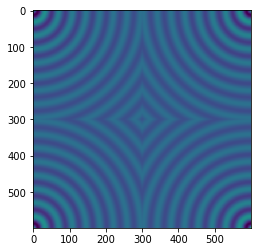

In [143]:
k0 = 50.0#
N = 300#

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int    
    eG = np.zeros((2*N-1,2*N-1),dtype=np.complex64)
    
    h = 1/(N-1)
    
    for i in range(-N+1,N):
        for j in range(-N+1,N):
            if(i==0 & j==0):
                eG[i][j] = 0
            else:
                r = h*np.sqrt(i**2+j**2)
                eG[i][j]= -1j/4*hankel2(0,k0*r)
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [144]:
from numpy import fft

In [148]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64
    X_matrix = np.zeros(eG.shape, dtype = np.complex64)
    N = eG.shape[0]//2+1
    X_matrix[:N,:N] = x.reshape(N,N)
    matvec = (fft.ifft2(fft.fft2(eG)*fft.fft2(X_matrix)))[:N,:N]    
    matvec = matvec.reshape(N**2)
    
    return matvec

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is ... It can be shown...

Complexity of fast matvec with circulant matrix takes $\mathcal{O}(n\log n)$ operations, where $n\times n$ is the size of this circulant matrix. Storafe for the fast matvec with multilevel Toeplitz matrix is $(2N -1)^2 = \mathcal{O}(N^2)$ elements. Therefore, the comlexity is $\mathcal{O}(N^2(\log (N)))$.

### 4. LinearOperator (2 pts)

In [149]:
x = np.random.rand((N**2))
L_Gx = scipy.sparse.linalg.LinearOperator((N**2,N**2), matvec=lambda x, eG=eG: Gx(x,eG)) 

### 5. Reconstruction (15pts)

/home/andrey/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Convergence')

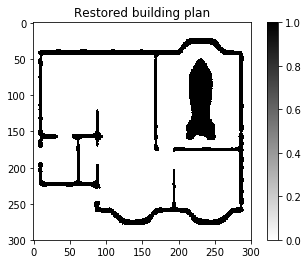

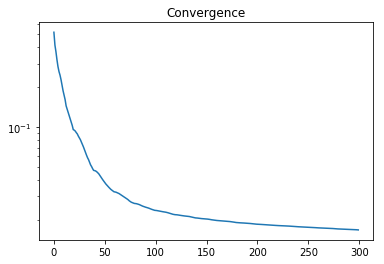

In [156]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 
x = radiointel.reshape(N*N)#, order= 'f')
mask = scipy.sparse.linalg.gmres(L_Gx,x, maxiter=N,callback=callback)
mask = mask[0].reshape(N,N)#, order= 'f')
plt.figure()
plt.imshow( normalize(mask) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')